In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os
from sklearn import metrics

In [3]:
DATA = "../data/competition_benchmark"

In [4]:
def roc_plot(ax, bt, yp):
    fpr, tpr, _ = metrics.roc_curve(bt, yp)
    ax.plot(fpr, tpr)
    ax.grid()
    ax.set_title("ROC AUC {0}".format(round(metrics.auc(fpr, tpr), 3)))
    return ax
def confusion_plot(ax, bt, bp):
    class_names = ['I (0)', 'A (1)']
    disp = metrics.ConfusionMatrixDisplay(metrics.confusion_matrix(bt, bp), display_labels = class_names)
    disp.plot(ax=ax, cmap=plt.cm.Greens, colorbar=False,)
    for labels in disp.text_.ravel():
        labels.set_fontsize(24)
    ax.grid(False)
    return ax

In [5]:
#load competition results
df = pd.read_csv(os.path.join(DATA, "competition_test.csv"))
df_25 = pd.read_csv(os.path.join(DATA,"competition_model_2.5", "output_competition_test.csv"))
df_1 = pd.read_csv(os.path.join(DATA,"competition_model_1", "output_competition_test.csv"))

In [6]:
#add binary activity to experimental results
bin_activity_25 = []
for i in df["activity"].tolist():
    if i <= 2.5:
        bin_activity_25.append(1)
    else:
        bin_activity_25.append(0)
df["bin_activity_2.5"] = bin_activity_25

bin_activity_1 = []
for i in df["activity"].tolist():
    if i <= 1:
        bin_activity_1.append(1)
    else:
        bin_activity_1.append(0)
df["bin_activity_1"] = bin_activity_1

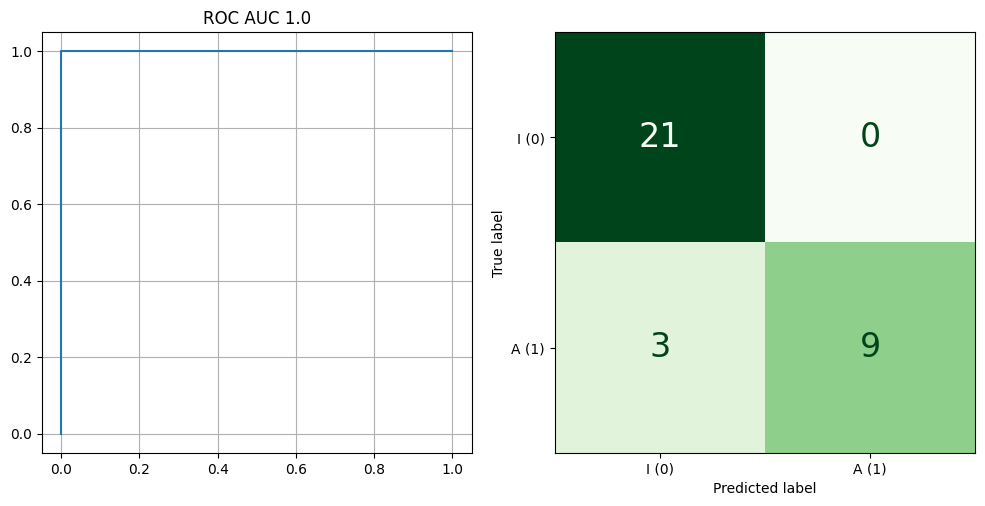

In [7]:
#THRESHOLD 2.5 uM
bt =  df["bin_activity_2.5"].tolist() #binary true
bp = df_25["clf_ex1_bin"].tolist() #binary predicted
proba = df_25["clf_ex1"].tolist() #predicted y proba

fig, axs = plt.subplots(1,2, figsize=(10,5))
axs = axs.flatten()
ax = axs[0]
roc_plot(ax, bt, proba)
ax = axs[1]
confusion_plot(ax, bt, bp)
plt.tight_layout()

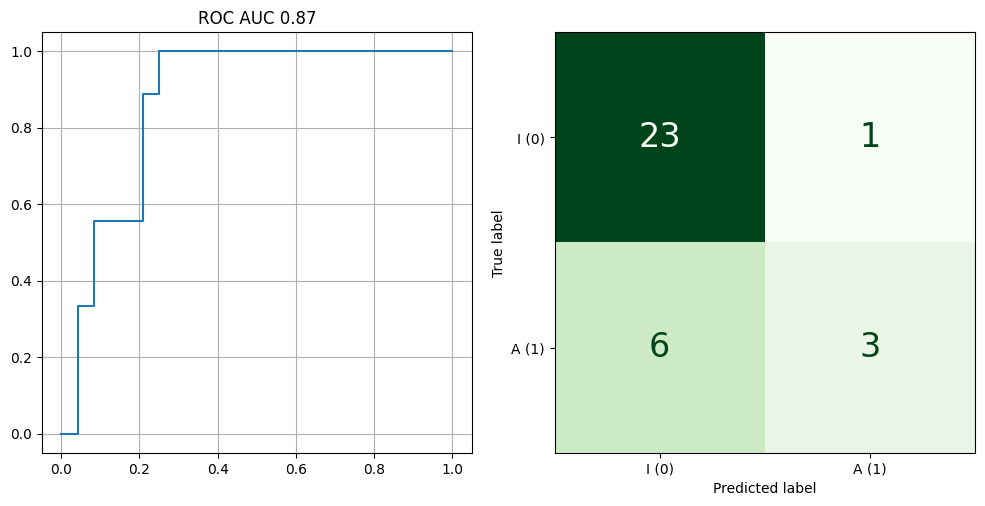

In [8]:
#THRESHOLD 1 uM
bt =  df["bin_activity_1"].tolist() #binary true
bp = df_1["clf_ex1_bin"].tolist() #binary predicted
proba = df_1["clf_ex1"].tolist() #predicted y proba

fig, axs = plt.subplots(1,2, figsize=(10,5))
axs = axs.flatten()
ax = axs[0]
roc_plot(ax, bt, proba)
ax = axs[1]
confusion_plot(ax, bt, bp)
plt.tight_layout()

Text(0, 0.5, 'Predicted activity (uM)')

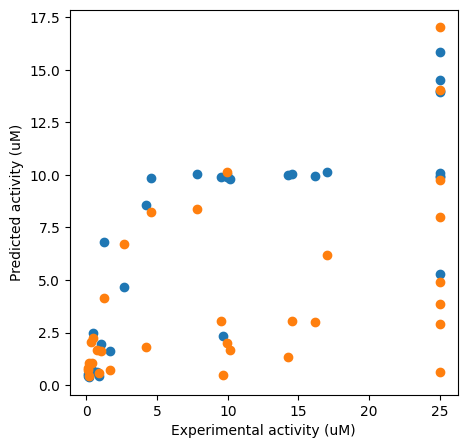

In [10]:
#Regression comparison
yt = df["activity"]
yp_25 = df_25["reg_raw"]
yp_1 = df_1["reg_raw"]

fig, ax= plt.subplots(1,1, figsize = (5,5))
ax.scatter(yt, yp_25)
ax.scatter(yt, yp_1)
ax.set_xlabel("Experimental activity (uM)")
ax.set_ylabel("Predicted activity (uM)")

In [11]:
mae_25 = metrics.mean_absolute_error(yt, yp_25)
mae_1 = metrics.mean_absolute_error(yt, yp_1)
rmse_25 = np.sqrt(metrics.mean_squared_error(yt, yp_25))
rmse_1 = np.sqrt(metrics.mean_squared_error(yt, yp_1))

In [20]:
#create comparison CSV file
df["bin_proba_2.5"] = df_25["clf_ex1"].tolist()
df["bin_proba_1"] = df_1["clf_ex1"].tolist()
df["reg_pred_25"] = df_25["reg_raw"].tolist()
df["reg_pred_1"] = df_1["reg_raw"].tolist()

df.to_csv(os.path.join(DATA, "competition_results.csv"), index=False)


## Model performance